This code is created using the following references
1.https://www.kaggle.com/ajay19/t20-cricket-data-visulisation/comments#668958
2.https://www.kaggle.com/vaishaligarg/analysing-ipl-data


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

matches = pd.read_csv('Match_Info.csv')
matches["type"] = "pre-qualifier"
for year in range(2008, 2017):
   final_match_index = matches[matches['Season']==year][-1:].index.values[0]
   matches = matches.set_value(final_match_index, "type", "final")
   matches = matches.set_value(final_match_index-1, "type", "qualifier-2")
   matches = matches.set_value(final_match_index-2, "type", "eliminator")
   matches = matches.set_value(final_match_index-3, "type", "qualifier-1")

matches.groupby(["type"])["Match_ID"].count()
matches.head()

,Match_ID,Season,Date,Team1,Team2,Toss_Winner,Toss_Decision,result,DL_Method,Winner,Win_By_Runs,Win_By_Wicket,Man_Of_The_Match,Venue,Umpire1,Umpire2,Umpire3,Total_Balls,type
0,1,2013,5/19/13,Pune Warriors,Delhi Daredevils,Pune Warriors,bat,Normal,0,Pune Warriors,38.0,NaN,LJ Wright,Subrata Roy Sahara Stadium,NJ Llong,SJA Taufel,NaN,250,pre-qualifier
1,2,2015,4/15/15,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,bat,Normal,0,Delhi Daredevils,NaN,5.0,MA Agarwal,Maharashtra Cricket Association Stadium,CB Gaffaney,K Srinath,NaN,253,pre-qualifier
2,3,2011,5/14/11,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Normal,1,Royal Challengers Bangalore,NaN,4.0,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN,159,pre-qualifier
3,4,2017,5/7/17,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,Normal,0,Gujarat Lions,NaN,6.0,DR Smith,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,VK Sharma,NaN,244,pre-qualifier
4,5,2010,4/17/10,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Normal,0,Mumbai Indians,57.0,NaN,R McLaren,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel,NaN,248,pre-qualifier


In [7]:
deliveries = pd.read_csv('Delivery_Info.csv')
deliveries.head()

,Match_ID,Innings,Batting_Team,Bowling_Team,Over,Ball,Batsman,Non_Striker,Bowler,Is_Super_Over,...,Bye_Runs,Legbye_Runs,Noball_Runs,Penalty_Runs,Batsman_Runs,Extras,Total_Runs,Player_Dismissed,Dismissal_Type,Fielder
0,1,1,Pune Warriors,Delhi Daredevils,1,1,RV Uthappa,AJ Finch,IK Pathan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Pune Warriors,Delhi Daredevils,1,2,RV Uthappa,AJ Finch,IK Pathan,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2,1,1,Pune Warriors,Delhi Daredevils,1,3,RV Uthappa,AJ Finch,IK Pathan,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Pune Warriors,Delhi Daredevils,1,4,RV Uthappa,AJ Finch,IK Pathan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Pune Warriors,Delhi Daredevils,1,5,RV Uthappa,AJ Finch,IK Pathan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# Analysing the importance of home ground on the Match

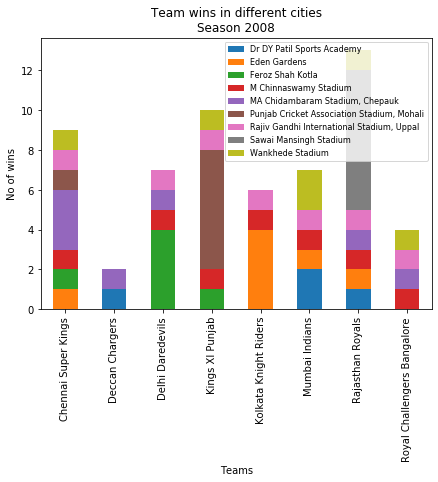

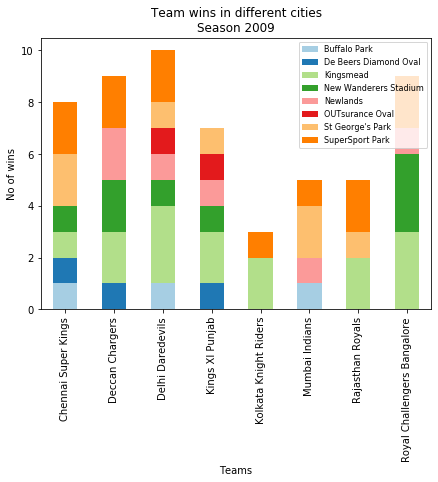

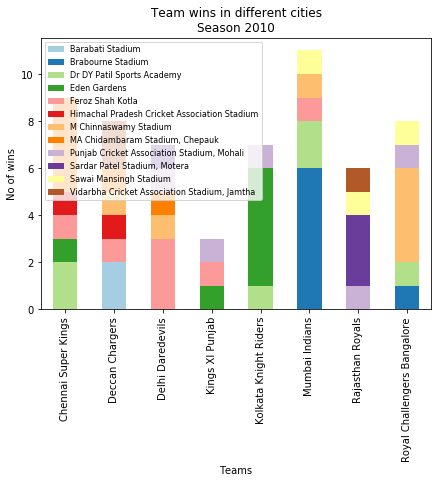

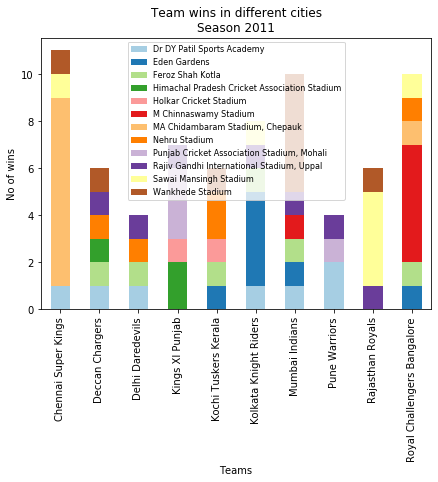

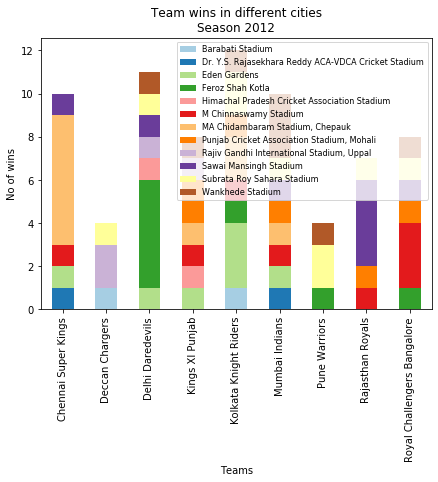

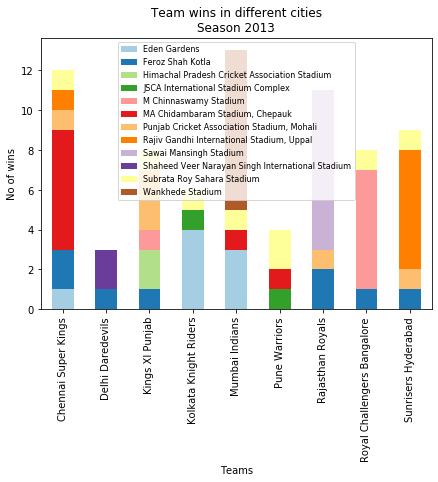

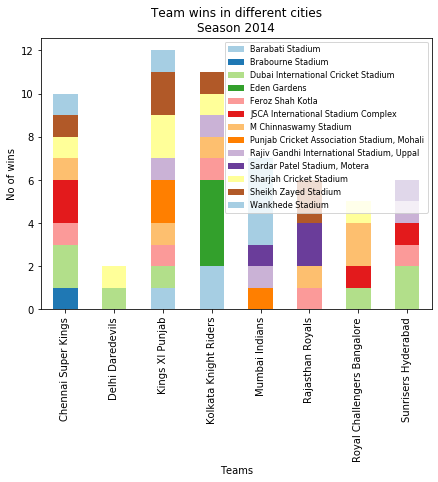

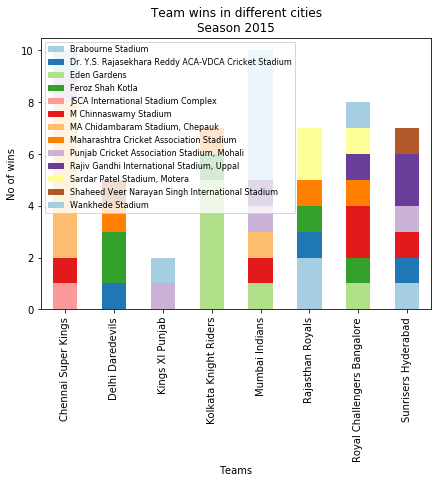

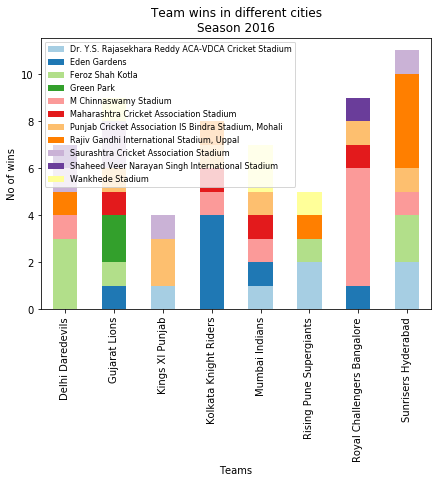

In [26]:
x, y = 2008, 2017
while x < y:
    wins_percity = matches_agg[matches_agg['Season'] == x].groupby(['Winner', 'Venue'])['Match_ID'].count().unstack()
    plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(x), figsize=(7, 5))
    sns.set_palette("Paired", len(matches_agg['Venue'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1

# Toss Impact

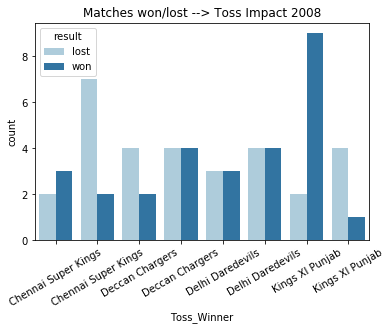

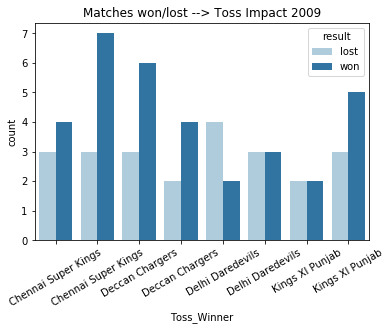

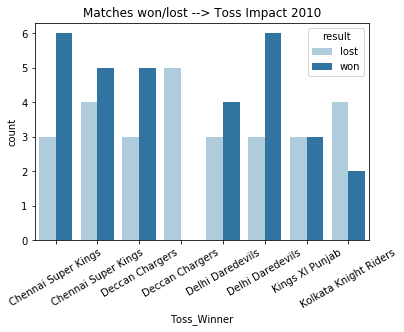

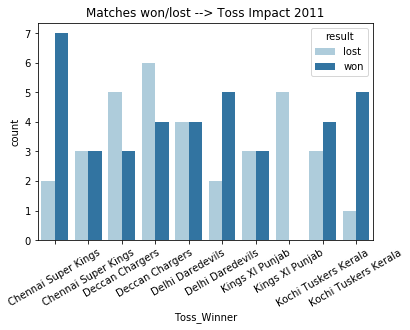

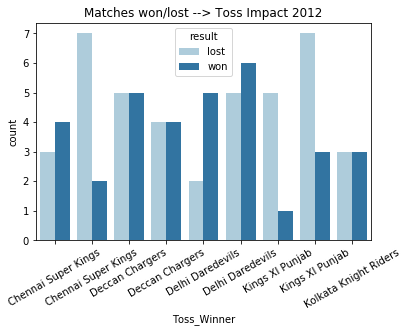

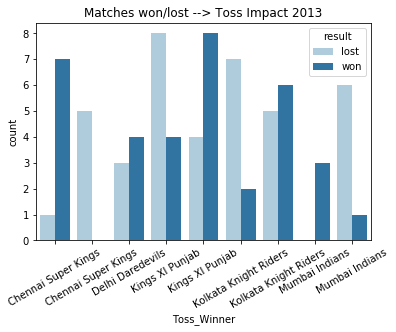

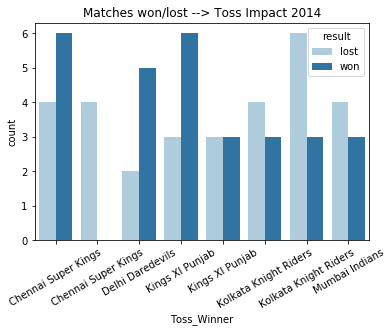

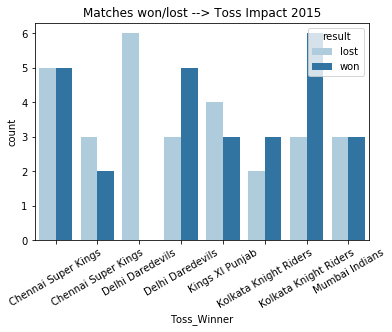

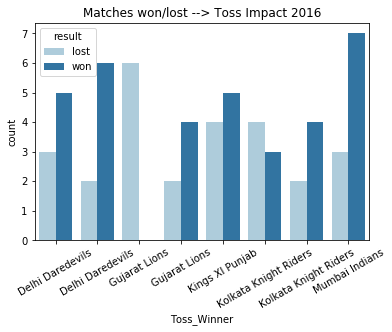

In [40]:
toss = matches_agg.groupby(['Season', 'Toss_Winner']).Winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.Toss_Winner == toss.Winner, 'won', 'lost')
toss_result = toss.groupby(['Season', 'Toss_Winner','result'])['count'].sum().reset_index()

for x in range(2008, 2017, 1):
    toss_result_x = toss_result[toss_result['Season'] == x]
    plot = sns.barplot(x="Toss_Winner", y="count", hue="result", data=toss_result_x)
    plot.set_title('Matches won/lost --> Toss Impact ' +str(x))
    plot.set_xticklabels(toss_result_x['Toss_Winner'],rotation=30)
    plt.show()
    x+=1